# Natural Language Processing(NLP)

NLP stands for Natural Language Processing. It means teaching computers how to understand and talk like people do. Just like how we learn to talk and understand what people say, we teach computers to do the same thing. This way, we can make computers do cool things like answering questions, translating languages, and even having a conversation with us!

There are different tasks involved with it. You can read more about them [here](https://en.wikipedia.org/wiki/Natural_language_processing#Common_NLP_tasks)

Today we will be maily discussing about the following simple tasks:
- Word as Vectors
- Visualizing the Word Vectors
- Spelling Corection
- POS Tagging

## Visualizing Word Vectors with t-SNE

TSNE is pretty useful when it comes to visualizing similarity between objects. It works by taking a group of high-dimensional (100 dimensions via Word2Vec) vocabulary word feature vectors, then compresses them down to 2-dimensional x,y coordinate pairs. The idea is to keep similar words close together on the plane, while maximizing the distance between dissimilar words. 

**Steps**

1. Clean the data
2. Build a corpus
3. Train a Word2Vec Model
4. Visualize t-SNE representations of the most common words 

Credit: Some of the code was inspired by this awesome [NLP repo](https://github.com/rouseguy/DeepLearningNLP_Py)

In [ ]:
!pip install pandas==1.5.3 numpy==1.22.4 nltk==3.7 gensim==4.2.0 sklearn==1.0.2

In [15]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk
from tqdm.notebook import tqdm
tqdm.pandas()
import gensim
from gensim.models import word2vec
import sklearn
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv", encoding = 'utf-8').sample(50000, random_state=23)

In [2]:
STOP_WORDS = nltk.corpus.stopwords.words() + ["br"]

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to reviews"
    data = data.dropna(how="any")
    
    for col in ['review']:
        data[col] = data[col].progress_apply(clean_sentence)
    
    return data

data = clean_dataframe(data)
data.head(5)

  0%|          | 0/10000 [00:00<?, ?it/s]

,Unnamed: 0,review,sentiment
0,49466,lot comments treat film baseball movie feel se...,positive
1,11621,young kills young woman reason mans brother ja...,negative
2,39058,macho roughntumble guys sexy gals venture remo...,positive
3,10033,christopher guests hilarious role stopped watc...,negative
4,22076,lively predictable opening bankheist scene set...,negative


In [3]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['review']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        

/tmp/ipykernel_284398/766531991.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for sentence in data[col].iteritems():


## Word2Vec

> "You shall know a word by the company it keeps”(J. R. Firth 1957: 11)

- When a word w appears in a text, its context is the set of words that appear nearby (within a fixed-size window).
- We use the many contexts of w to build up a representation of w 
- There are two ways of training a model, namely **Continious Bag of Words** and **Skipgram**.  
![](https://www.researchgate.net/profile/Wang-Ling-16/publication/281812760/figure/fig1/AS:613966665486361@1523392468791/Illustration-of-the-Skip-gram-and-Continuous-Bag-of-Word-CBOW-models.png)
- For demostration, we can take this toy example  
![word2vec](https://i.imgur.com/ZqCo8kZ.png)  The Likelihood = $L(\theta)$ = $\prod_{t = 1}^T \prod_{-m\le j \le m} P(w_{t+j}|w_t;\theta)$
- We don't know $P(w_{t+j}|w_t)$, so we create a architecture, to estimate it iteratively.  
![word2vec model](http://mbenhaddou.com/wp-content/uploads/2019/12/img_4.png)
- The `Word2Vec` model produces a vocabulary, with each word being represented by an n-dimensional numpy array (100 values in this example)

After getting the vectors, from the Word2Vec model, we can infer some Analogy wrt to their meanings.  
![WV|300](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Word_vector_illustration.jpg/1024px-Word_vector_illustration.jpg)

In [25]:
model = word2vec.Word2Vec(corpus, vector_size=100, window=20, min_count=200, workers=4)
model.wv['classic']

array([-0.5465006 ,  0.5509136 ,  0.34487495, -0.28710246,  0.87677735,
       -0.9233614 ,  0.42378956, -0.2444575 , -1.2851063 , -0.34374118,
       -0.22257468, -0.99853873, -0.30707967, -0.3596728 ,  0.11494528,
        0.6929271 , -0.7274939 ,  1.0236468 , -0.18592127, -1.1423256 ,
        0.11888876, -0.81357974,  0.94201803, -0.69579524,  0.25776044,
        0.26388755, -1.1215094 , -0.20443143, -0.613775  , -0.42057672,
        0.29637268,  0.5572583 ,  0.54838645, -0.07441067,  0.1312072 ,
        0.38704303, -0.3601507 , -0.5612256 , -0.9197517 ,  0.34160972,
        0.14712529,  0.09530666, -0.38517562,  0.26029414, -1.2136216 ,
        0.12787892,  1.0165845 ,  0.11200106, -0.9726388 ,  1.2036141 ,
       -0.0056352 , -0.8003569 ,  0.5724035 ,  0.01162399, -0.10991073,
        0.74054265,  0.66791517,  0.6555285 , -0.1384942 ,  0.2577654 ,
        1.0045092 , -0.08496976,  0.2582156 ,  0.09066377, -0.18223652,
       -0.8733689 , -0.48655704, -0.47523668,  0.7705724 , -0.05

In [26]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.key_to_index.keys():
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/home/devildev/.local/share/miniconda3/envs/nlp/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/devildev/.local/share/miniconda3/envs/nlp/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


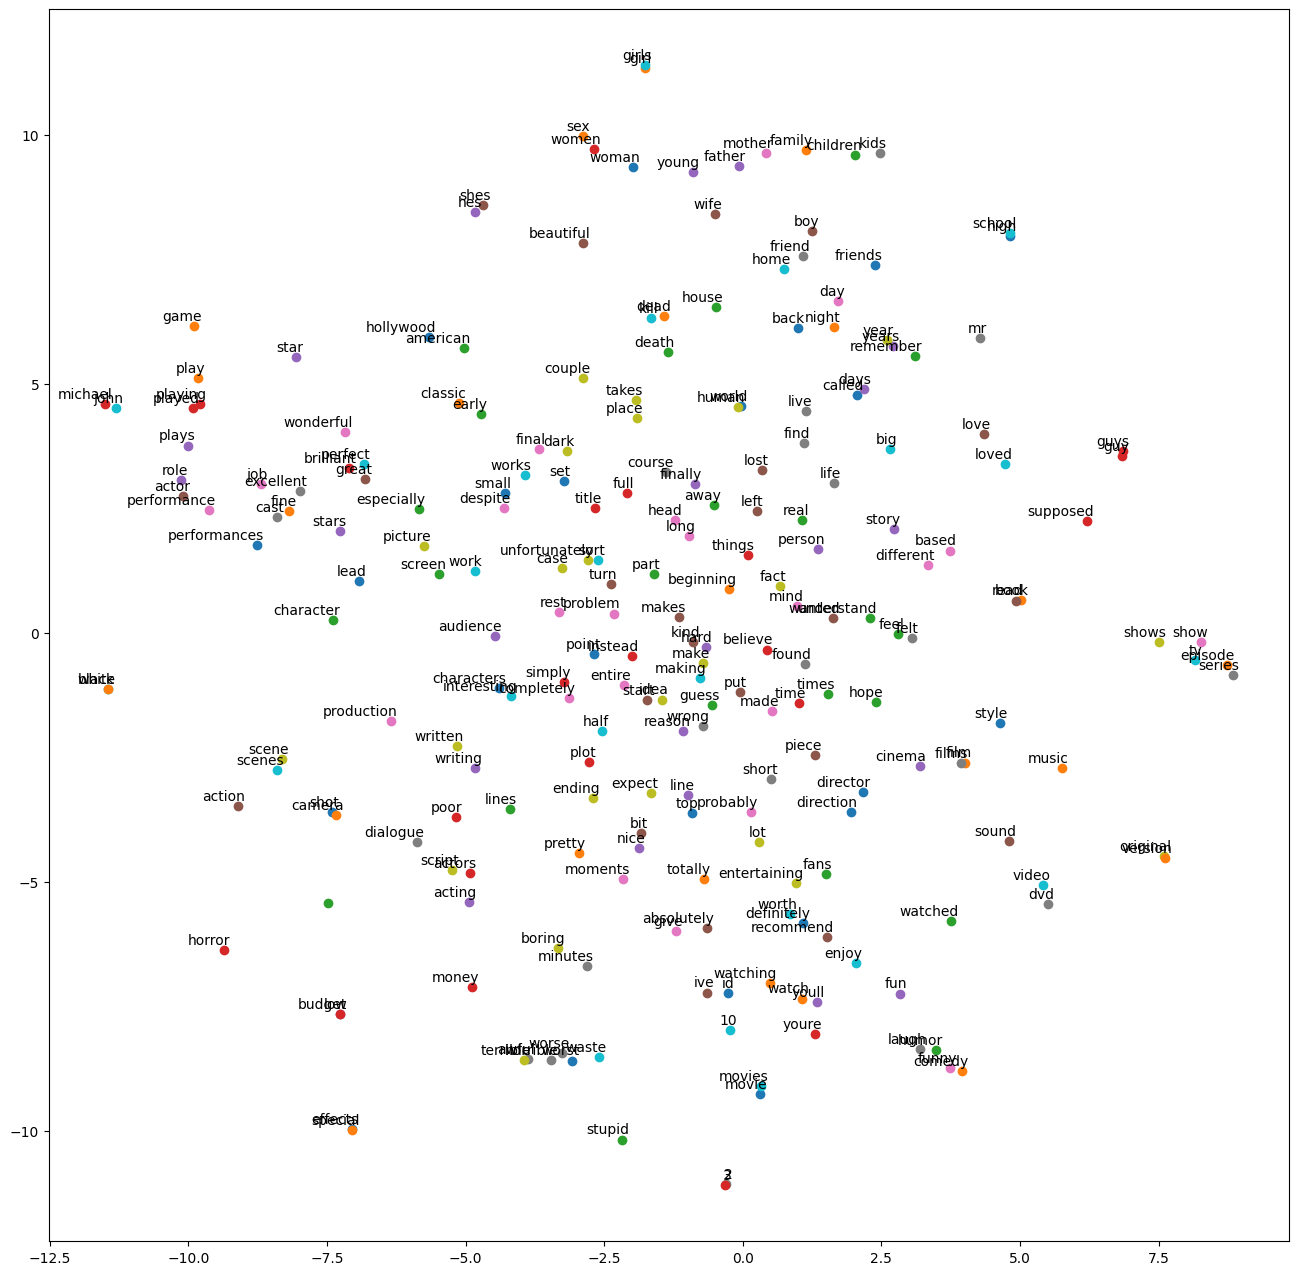

In [7]:
# A more selective model
model = word2vec.Word2Vec(corpus[:10000], vector_size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

/home/devildev/.local/share/miniconda3/envs/nlp/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/devildev/.local/share/miniconda3/envs/nlp/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


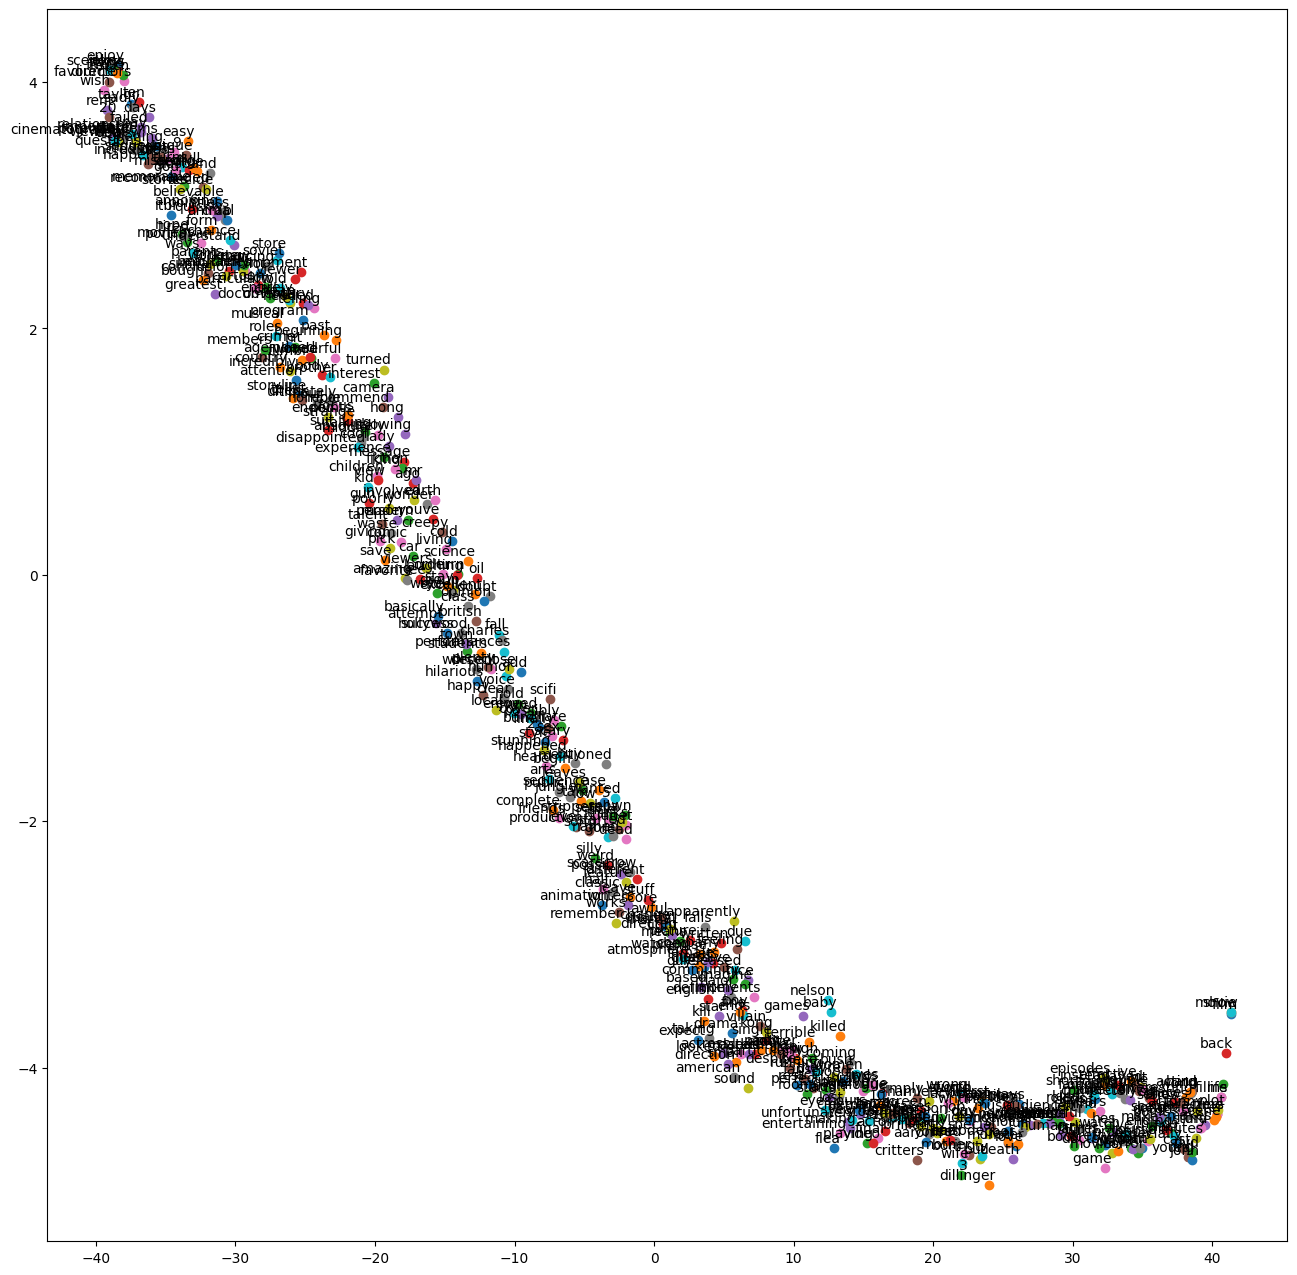

In [8]:
# A less selective model
model = word2vec.Word2Vec(corpus[:300], vector_size=100, window=20, min_count=10, workers=4)
tsne_plot(model)

**Find Similar Terms**

With a dataset this large, its difficult to make an easy-to-read TSNE visualization. What you can do is use the model to look up the most similar words from any given point. 

In [9]:
model.wv.most_similar('fiction')

[('made', 0.9994027018547058),
 ('work', 0.9993653297424316),
 ('funny', 0.99936443567276),
 ('find', 0.9993560314178467),
 ('movie', 0.9993511438369751),
 ('back', 0.999350368976593),
 ('characters', 0.9993452429771423),
 ('plot', 0.9993400573730469),
 ('film', 0.9993399381637573),
 ('place', 0.9993249177932739)]

In [12]:
model.wv.most_similar('classic')

[('scene', 0.9994849562644958),
 ('movie', 0.9994775056838989),
 ('film', 0.9994694590568542),
 ('completely', 0.9994630217552185),
 ('felt', 0.9994558095932007),
 ('father', 0.9994428157806396),
 ('times', 0.9994414448738098),
 ('find', 0.9994401931762695),
 ('funny', 0.9994351863861084),
 ('cast', 0.9994327425956726)]

## Spell Checker

In almost all search engines we see the autocomplete feature and spell checking feature. It can be done fairly easily with [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance) algorithm to get all the words from the dictionary within some edit distance, then rank them according to some criteria.

The Levenshtein Algorithm is as follows:-  
![Levenstein Distance](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRUsxMU95gx_mQXF9gwqBdkpfqRyJrIsBssrFP8uJqTKLoPPeqKAffMyBqJwvPFuTrW6w)

The Ranking can be done using various criterias, in the below examples we use the word order index as the key. You can also take the word with most frequency in the corpus.

In [18]:
import numpy as np 
import pandas as pd 
import gensim

In [19]:
words = model.wv.index_to_key
w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i
WORDS = w_rank

In [20]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

def P(word): 
    # Probability of `word`.
    # We can use the frequency as rank
    # N = len(words)
    # return words.get(word, 0) / N
    
    # we can also use inverse of rank as proxy
    # returns 0 if the word isn't in the dictionary
    return -WORDS.get(word, 0)

def correction(word): 
    # Most probable spelling correction for word.
    return max(candidates(word), key=P)

def candidates(word): 
    # Generate possible spelling corrections for word.
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    # The subset of `words` that appear in the dictionary of WORDS.
    return set(w for w in words if w in WORDS)

def edits1(word):
    # All edits that are one edit away from `word`.
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

That's it. If you have downloaded word2vec then you can start using this code.  Here are few examples of what it does.

correction('quikly') returns quickly

correction('israil') returns israel

correction('neighbour') returns neighbor

In [21]:
correction('quicly')

'quickly'

In [22]:
correction('fition')

'fiction'

## POS Tagging

Part-of-speech (POS) tagging is useful in natural language processing for a variety of reasons.
Here are some of the key ways that POS tagging is used:

- **Text classification**: POS tagging is used to classify texts based on their language and grammatical structures. For example, it can be used to differentiate between formal and informal writing, or to identify texts written in different languages.

- **Information retrieval**: POS tagging is used to retrieve information from texts based on the parts of speech of words. For example, it can be used to search for nouns or verbs in a document, or to retrieve all adjectives used to describe a particular subject.

- **Machine translation**: POS tagging is used in machine translation to help identify the correct meaning of words in a sentence. This helps to ensure that the correct words are translated, and that the translation is grammatically correct.

- **Text-to-speech synthesis**: POS tagging is used in text-to-speech synthesis to help the computer understand the correct pronunciation of words based on their parts of speech. This helps to create more natural-sounding speech.

In [23]:
import nltk

# Define a sample sentence
sentence = "The cat is sleeping on the mat"

# Tokenize the sentence
tokens = nltk.word_tokenize(sentence)

# Perform POS tagging on the tokens
pos_tags = nltk.pos_tag(tokens)

# Print the POS tags
print(pos_tags)

[('The', 'DT'), ('cat', 'NN'), ('is', 'VBZ'), ('sleeping', 'VBG'), ('on', 'IN'), ('the', 'DT'), ('mat', 'NN')]


### Classifier to differentiate between formal and informal writing

We try to create a dummy classifier, which can take sentences and predict the label as 'formal' or 'informal'.

In [24]:
import nltk

# Load the sample dataset
dataset = [("This is a formal document", "formal"),
           ("I had a chat with my friend", "informal"),
           ("The cat is sleeping on the mat", "informal"),
           ("The report is due on Monday", "formal"),
           ("What's up dude?", "informal")]

# Define a function to extract POS tags from a sentence
def extract_pos_tags(sentence):
    tokens = nltk.word_tokenize(sentence)
    pos_tags = nltk.pos_tag(tokens)
    return dict(pos_tags)

# Extract features from the dataset
featuresets = [(extract_pos_tags(sentence), label) for (sentence, label) in dataset]

# Split the dataset into training and testing sets
train_set, test_set = featuresets[:3], featuresets[3:]

# Train a Naive Bayes classifier on the training set
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Test the classifier on the testing set
accuracy = nltk.classify.accuracy(classifier, test_set)

# Print the accuracy of the classifier
print("Accuracy:", accuracy)

# Test the classifier on a new sentence
new_sentence = "Team, I am on leave"
new_featureset = extract_pos_tags(new_sentence)
print("Prediction:", classifier.classify(new_featureset))

Accuracy: 0.5
Prediction: informal


## Exercises

Lets do some simple questions, to better understand the pre-processing parts in NLP

- Question 1:  
Perform word tokenization on string 
"Let’s go and meet Mr. Takashi, one of the prominent members of N.C.A. in Japan."

- Question 2:  
Write a custom function to perform stemming to handle "ed" at the end of a word.

- Question 3:  
Remove emails from the given text using regular expressions?
```py
text = '''Dave Martin
615-555-7164
173 Main St., Springfield RI 55924
davemartin@gmail.com
Charles Harris
800-555-5669
969 High St., Atlantis VA 34075
charlesharris@bogusemail.com
Eric Williams
560-555-5153
806 1st St., Faketown AK 86847
laurawilliams@outlook.com'''
```